In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline

from joblib import dump, load

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("C:/Users/onkar/OneDrive/Desktop/Major project/health-breast-cancer-wisconsin/health-breast-cancer-wisconsin/breast-cancer-wisconsin-data/data.csv")

# Exploratory Data Analysis

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.shape

(569, 33)

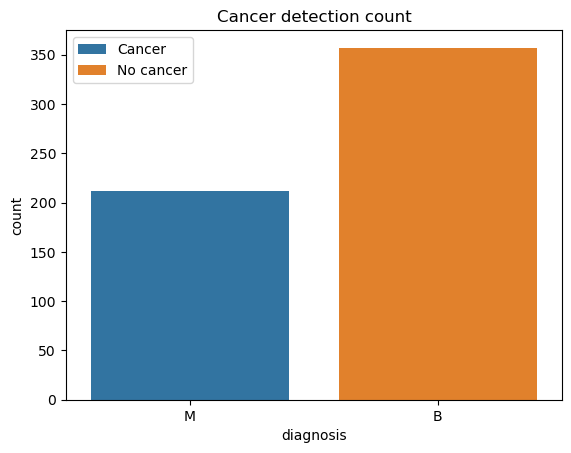

In [8]:
sns.countplot(x = df.diagnosis, hue = df.diagnosis)
plt.title('Cancer detection count')
plt.legend(labels = ['Cancer', 'No cancer'])

In [9]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Removing 'Unnamed: 32' column

In [12]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [13]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Data Visualization

**Coorelation heatmap**

<Axes: >

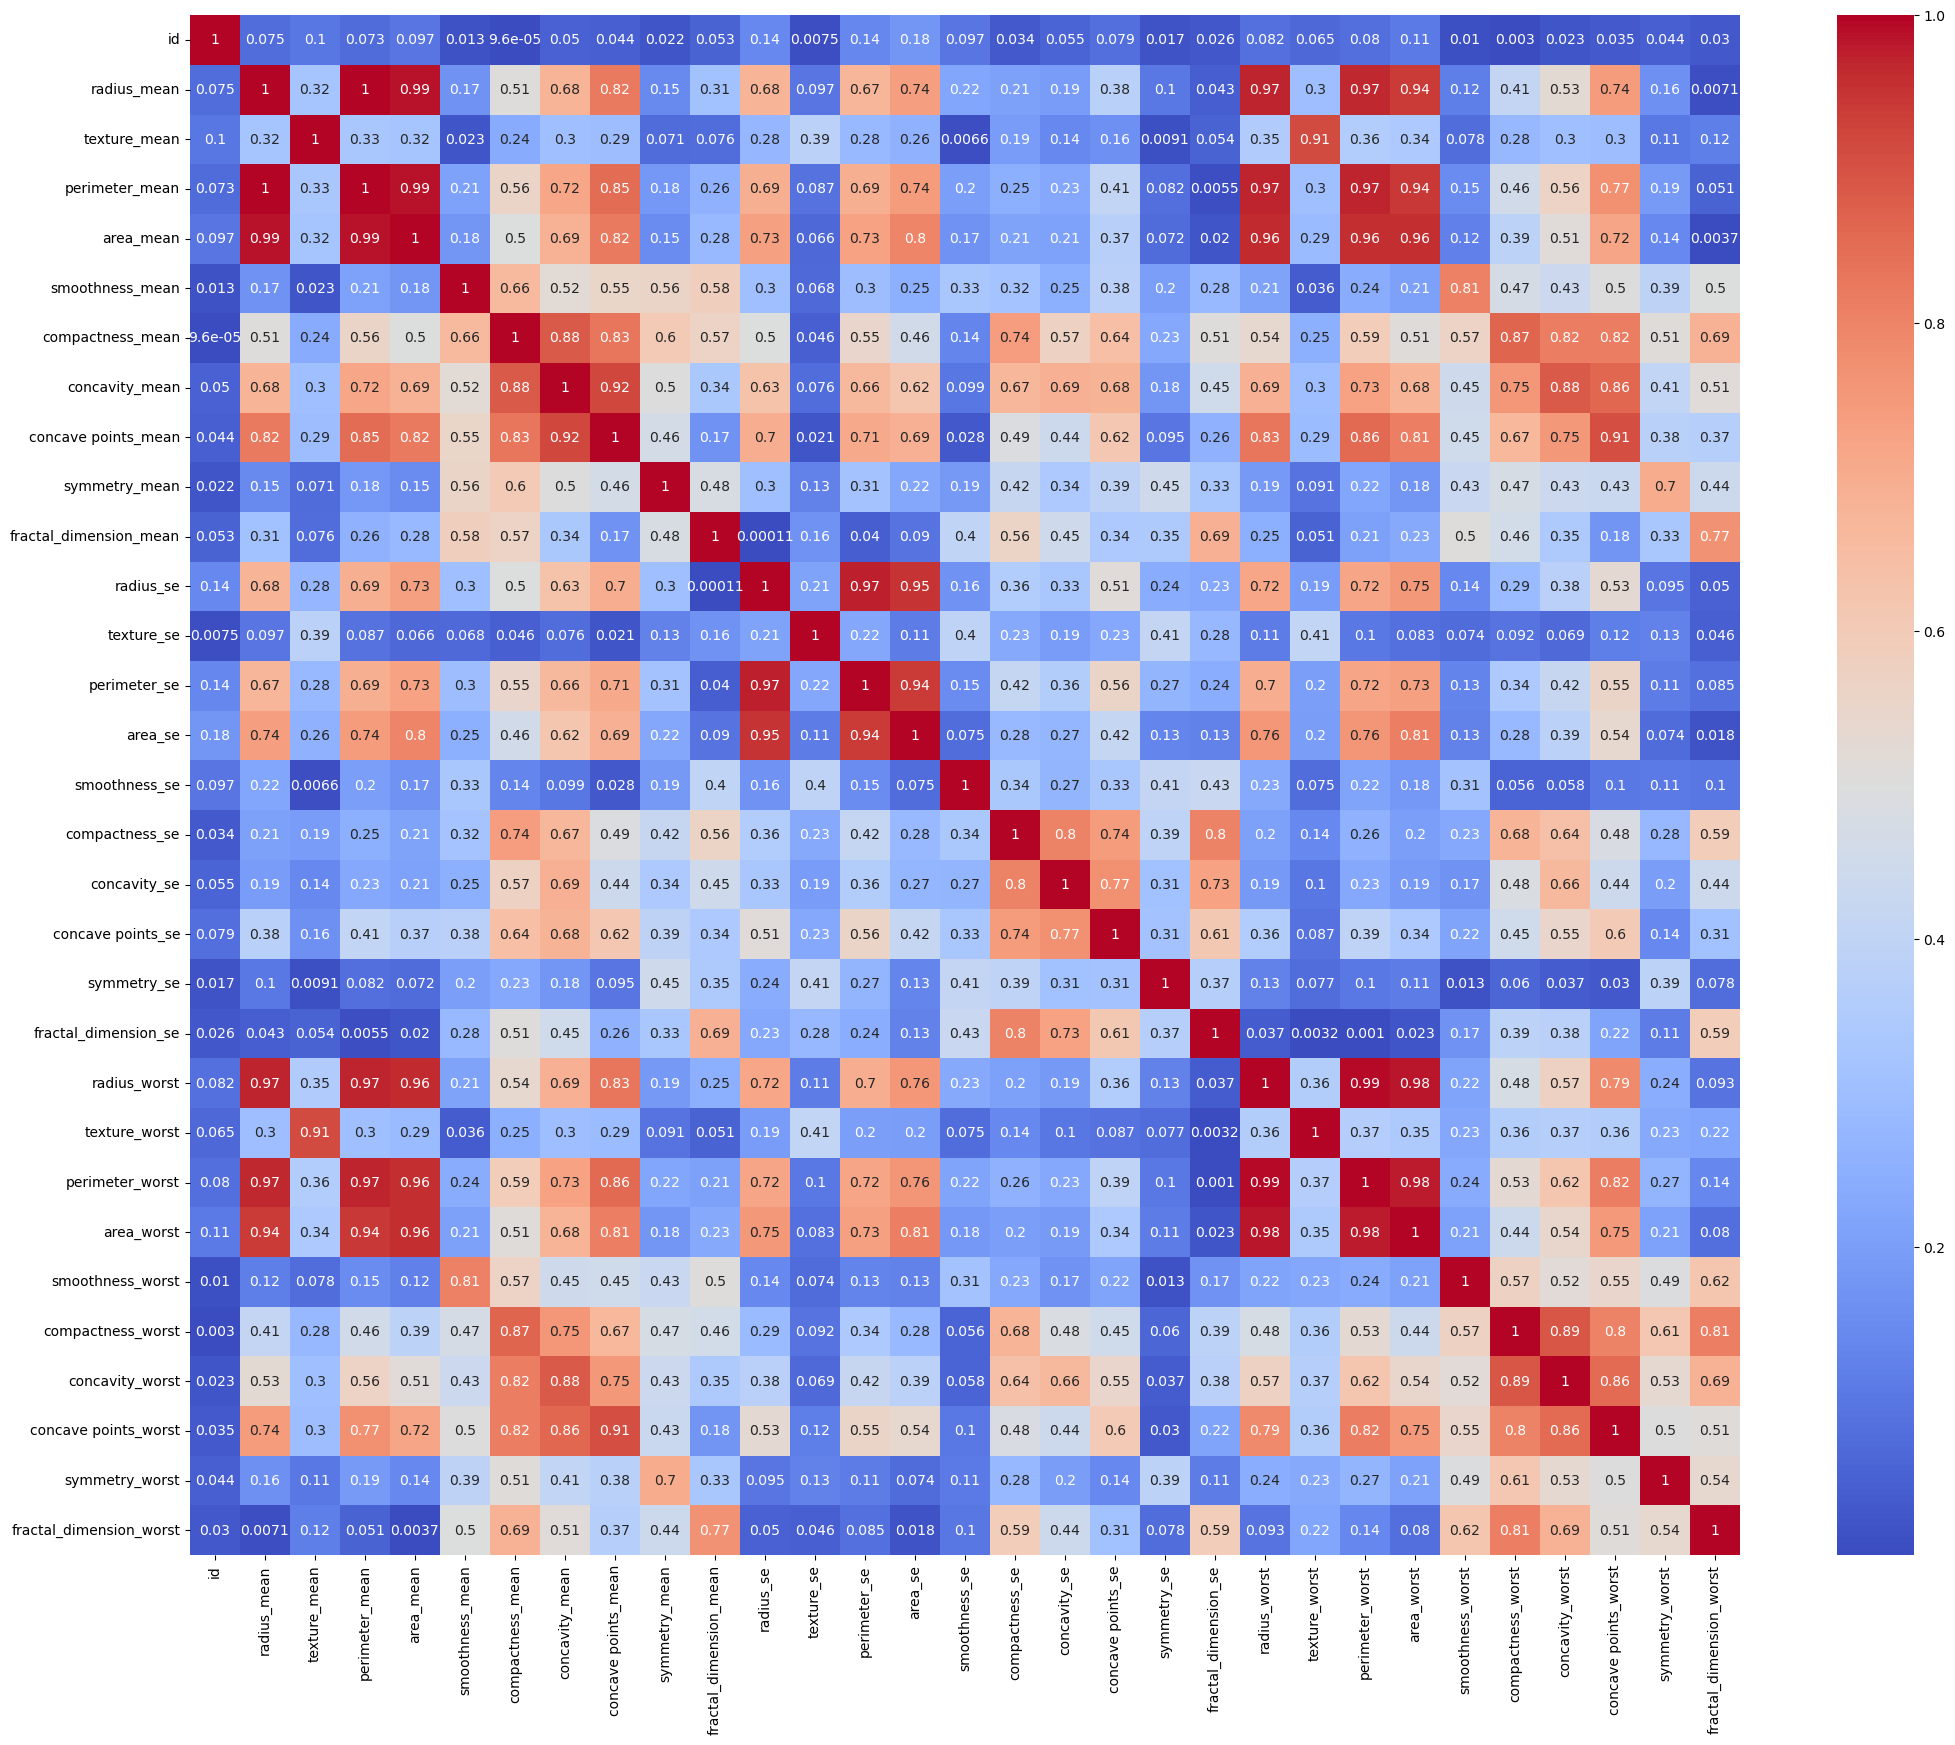

In [16]:
corr_matrix = df.drop('diagnosis', axis = 1).corr(method = 'pearson').abs()

plt.figure(figsize = (25, 20))
sns.heatmap(data = corr_matrix, annot = True, cmap = 'coolwarm')

In [17]:
threshold = 0.95

# Getting pairs of highly correlated features
high_corr_pairs = [(i, j, corr_matrix.loc[i, j])
                   for i in corr_matrix.columns for j in corr_matrix.columns
                   if (i != j) and (abs(corr_matrix.loc[i, j]) > threshold)]

high_corr_df = pd.DataFrame(high_corr_pairs, columns = ["Feature1", "Feature2", "Correlation"])
high_corr_df

,Feature1,Feature2,Correlation
0,radius_mean,perimeter_mean,0.997855
1,radius_mean,area_mean,0.987357
2,radius_mean,radius_worst,0.969539
3,radius_mean,perimeter_worst,0.965137
4,perimeter_mean,radius_mean,0.997855
5,perimeter_mean,area_mean,0.986507
6,perimeter_mean,radius_worst,0.969476
7,perimeter_mean,perimeter_worst,0.970387
8,area_mean,radius_mean,0.987357
9,area_mean,perimeter_mean,0.986507


**Pairplot**

In [19]:
features_pairplot = pd.unique(high_corr_df[["Feature1", "Feature2"]].values.ravel())
features_pairplot

array(['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'radius_se', 'perimeter_se',
       'area_se'], dtype=object)

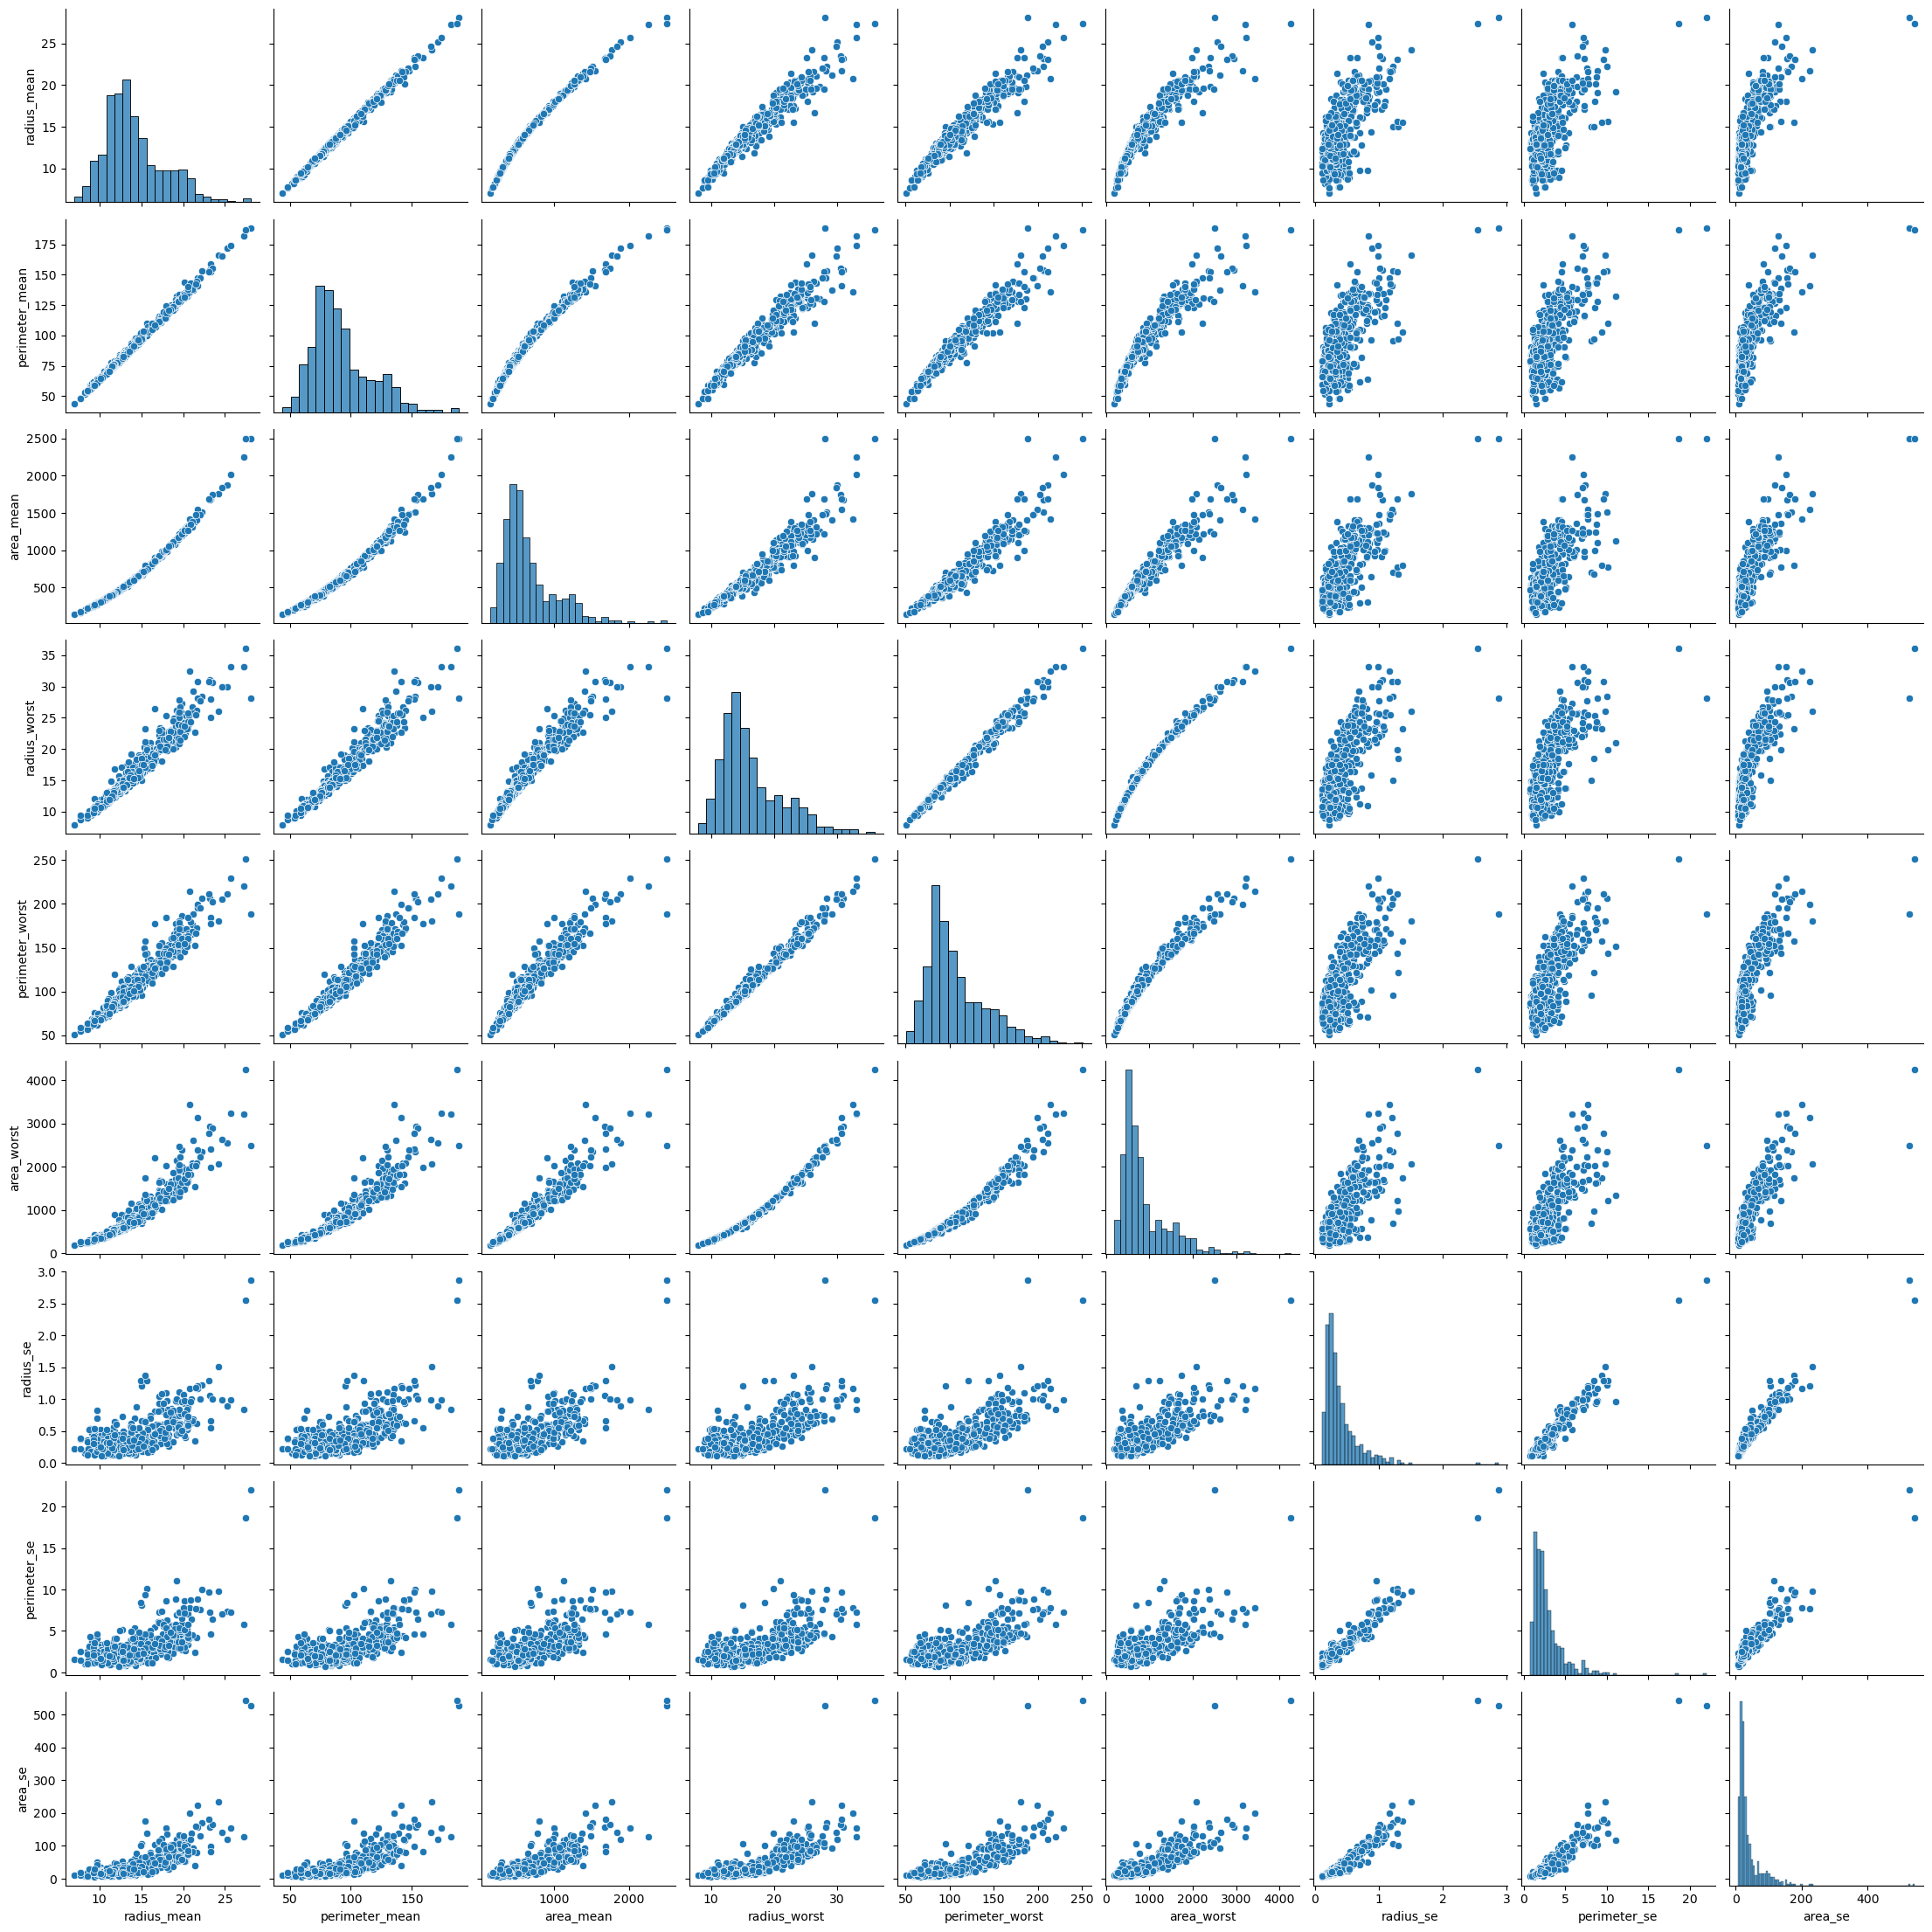

In [20]:
sns.pairplot(df[features_pairplot])

**Histograms**

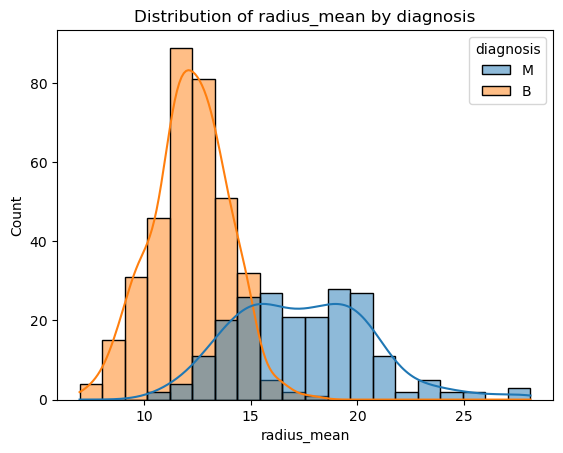

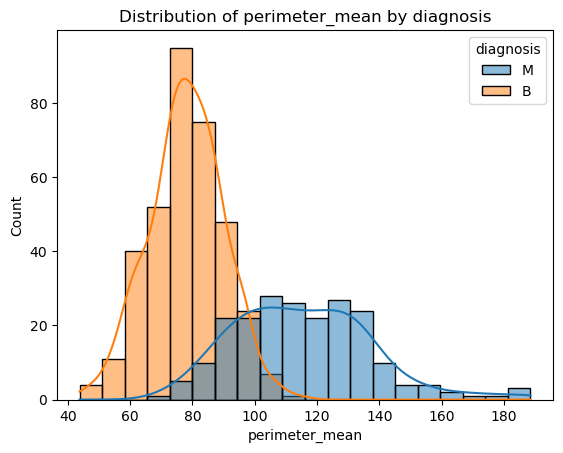

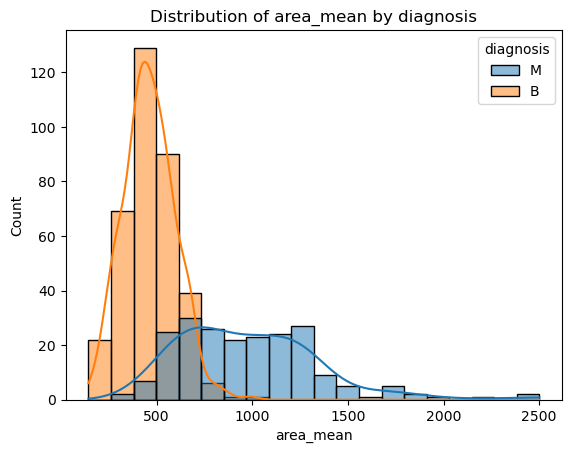

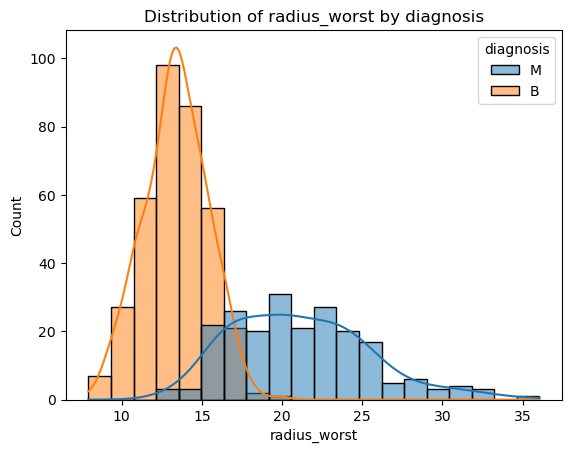

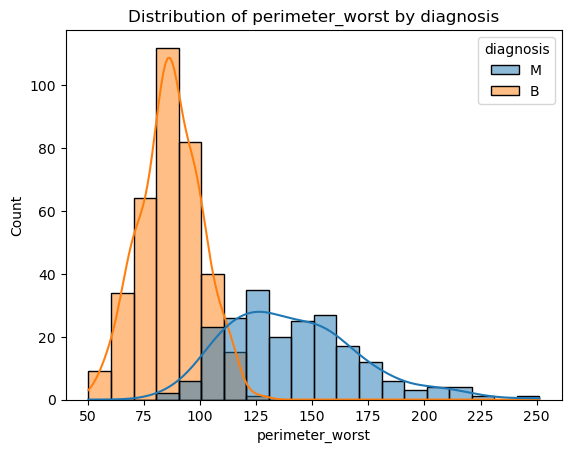

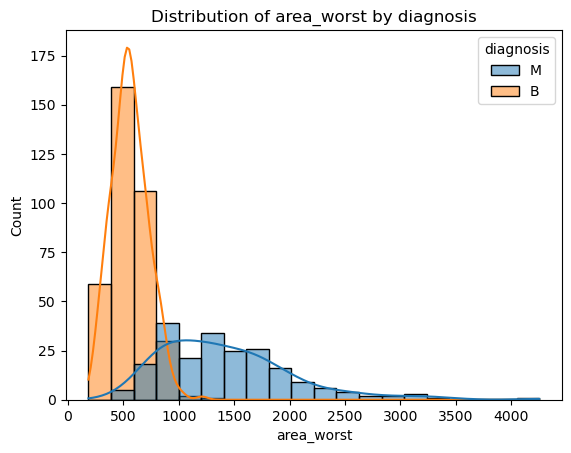

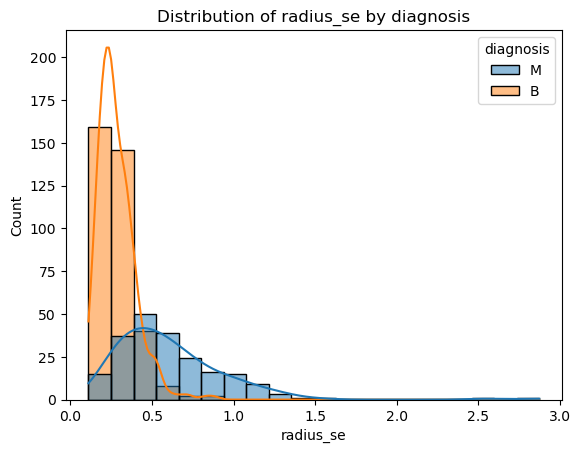

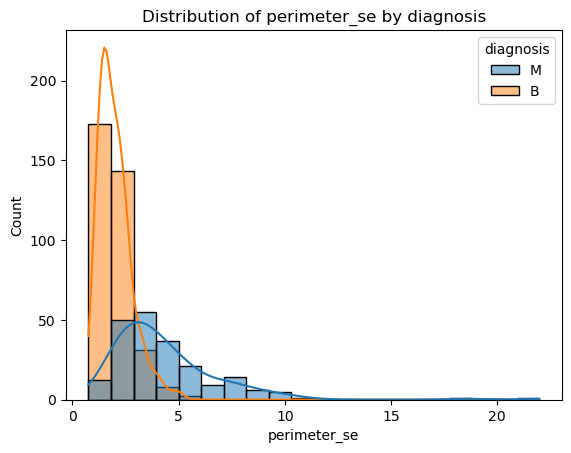

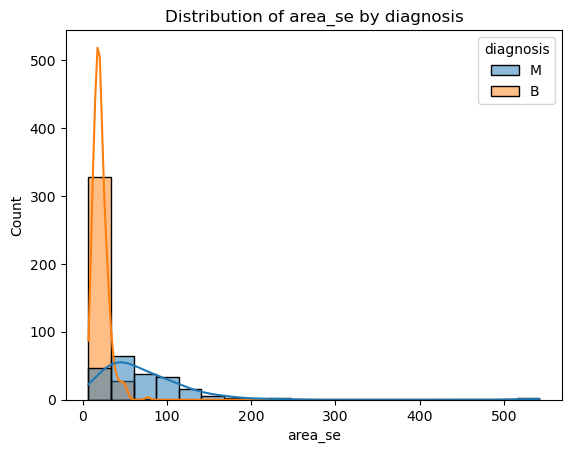

In [22]:
for feature in features_pairplot:
    sns.histplot(data = df, x = feature, hue = 'diagnosis', kde = True, bins = 20)
    plt.title(f'Distribution of {feature} by diagnosis')
    plt.show()

**Boxplots**

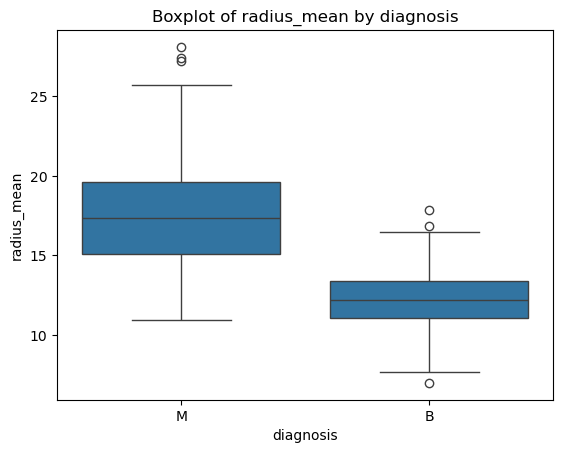

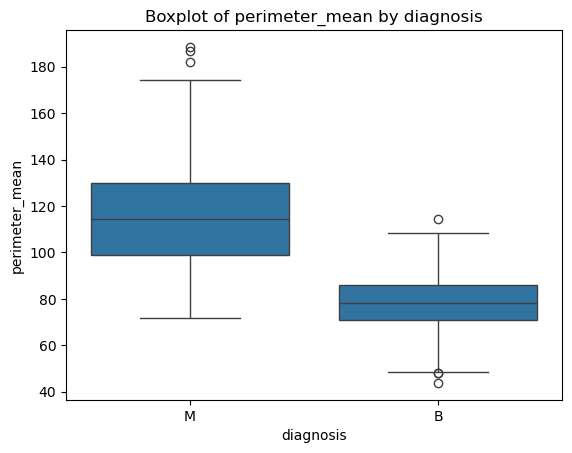

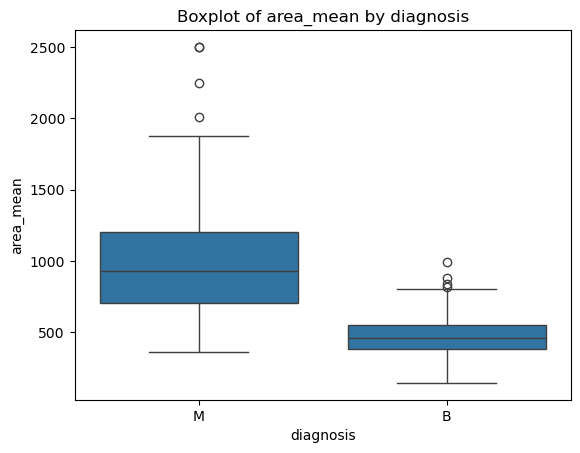

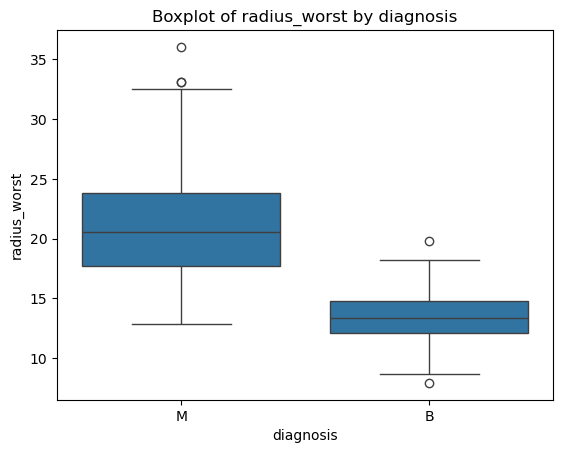

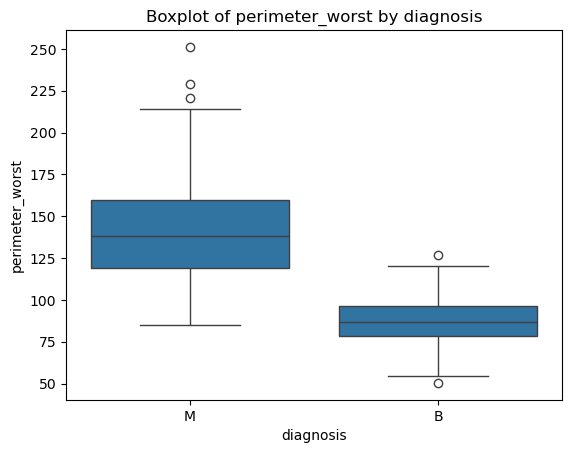

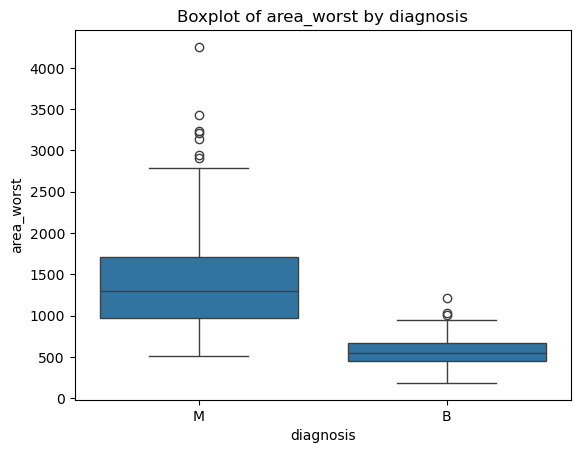

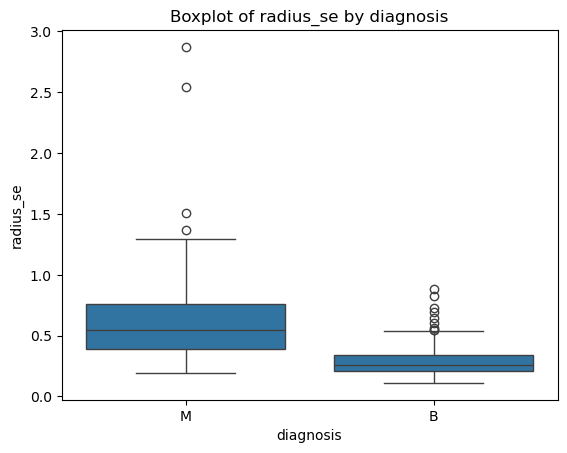

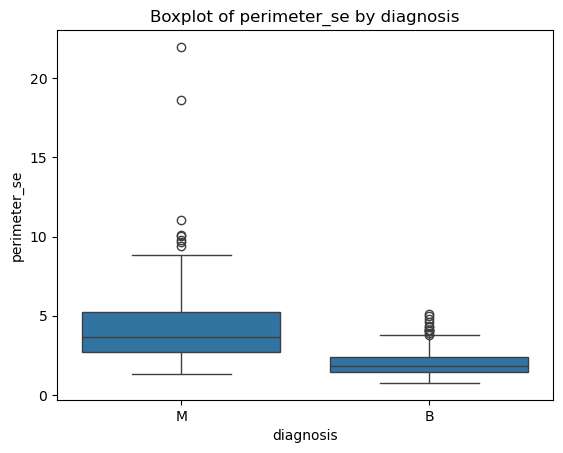

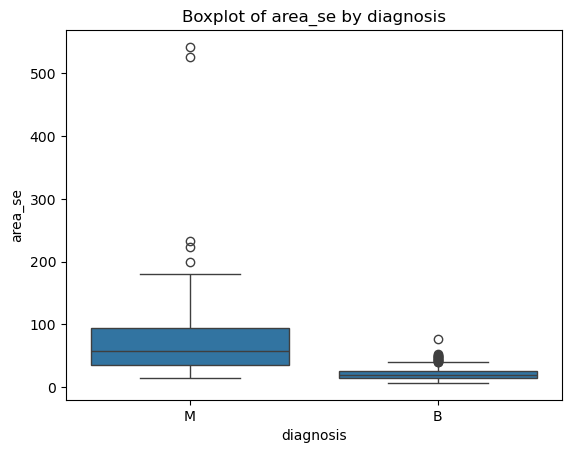

In [24]:
for feature in features_pairplot:
    sns.boxplot(data = df, x = 'diagnosis', y = feature)
    plt.title(f'Boxplot of {feature} by diagnosis')
    plt.show()

# Data Preprocessing

**Removing outliers**

In [27]:
for feature in features_pairplot:
    Q3 = df[feature].quantile(0.75)
    Q1 = df[feature].quantile(0.25)

    iqr = Q3 - Q1

    lower_lim = Q1 - (1.5 * iqr)
    upper_lim = Q3 + (1.5 * iqr)

    df = df[(df[feature] >= lower_lim) & (df[feature] <= upper_lim)]

df.shape

(427, 32)

**Feature Engineering**

In [29]:
# Area-to-Perimeter Ratio (Mean)
df['area_perimeter_ratio'] = df['area_mean'] / df['perimeter_mean']

# Radius-to-Perimeter Ratio (Mean)
df['radius_perimeter_ratio'] = df['radius_mean'] / df['perimeter_mean']

# Concavity-to-Perimeter Ratio (Mean)
df['concavity_perimeter_ratio'] = df['concavity_mean'] / df['perimeter_mean']

# Difference Between Mean and Worst Values
df['radius_diff'] = df['radius_worst'] - df['radius_mean']
df['perimeter_diff'] = df['perimeter_worst'] - df['perimeter_mean']
df['area_diff'] = df['area_worst'] - df['area_mean']

# Form Factor (Compactness Measure based on Mean Values)
df['form_factor'] = (4 * df['area_mean']) / (np.pi * df['perimeter_mean'] ** 2)

# Elongation (Mean Radius / Mean Smoothness)
df['elongation'] = df['radius_mean'] / df['smoothness_mean']

In [30]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_perimeter_ratio,radius_perimeter_ratio,concavity_perimeter_ratio,radius_diff,perimeter_diff,area_diff,form_factor,elongation
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,4.976798,0.147203,0.003112,3.49,21.29,181.6,0.081679,80.140351
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,5.778128,0.150781,0.001911,3.02,20.83,264.5,0.089099,97.417840
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,5.940571,0.148571,0.002125,2.49,18.70,219.5,0.086443,102.120974
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,5.667500,0.148386,0.002707,2.63,13.68,235.5,0.085936,105.059022
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,7.768257,0.155988,0.000321,3.17,21.10,352.2,0.096308,195.223008


**Splitting the data**

In [32]:
X = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 42, stratify = y_train_val)

**Encoding 'diagnosis' column**

In [34]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

**Scaling the data**

In [36]:
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_val = standard_scaler.transform(X_val)
X_test = standard_scaler.transform(X_test)

# Model Building & Evaluation

*Making a table to get all the results*

In [39]:
def make_results(model_name, y_testdata, y_preddata):
    accuracy = accuracy_score(y_testdata, y_preddata)
    precision = precision_score(y_testdata, y_preddata)
    recall = recall_score(y_testdata, y_preddata)
    f1 = f1_score(y_testdata, y_preddata)
    roc_auc = roc_auc_score(y_testdata, y_preddata)
    
    table = pd.DataFrame({'model': [model_name],
                          'accuracy': [accuracy],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'roc auc': [roc_auc]
                         })
    return table

Final_results = pd.DataFrame()

## 1. Logistic Regression

*Building*

In [42]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_val)
y_pred_lr

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

*Evaluation*

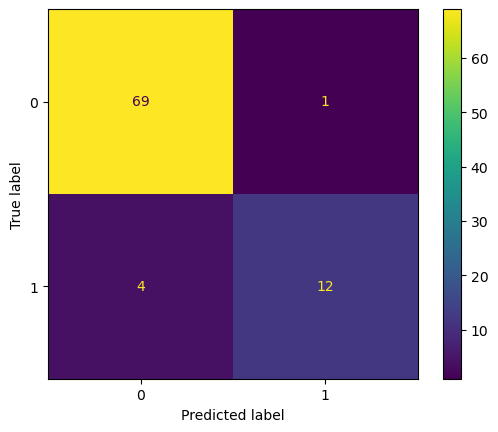

In [44]:
cm_lr = confusion_matrix(y_val, y_pred_lr, labels = lr.classes_)
disp_lr = ConfusionMatrixDisplay(cm_lr, display_labels = lr.classes_)
disp_lr.plot()

In [45]:
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred_lr))
print("Precision:", "%.6f" % precision_score(y_val, y_pred_lr))
print("Recall:", "%.6f" % recall_score(y_val, y_pred_lr))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred_lr))
print("ROC AUC Score:", "%.6f" % roc_auc_score(y_val, y_pred_lr))

Accuracy: 0.941860
Precision: 0.923077
Recall: 0.750000
F1 Score: 0.827586
ROC AUC Score: 0.867857


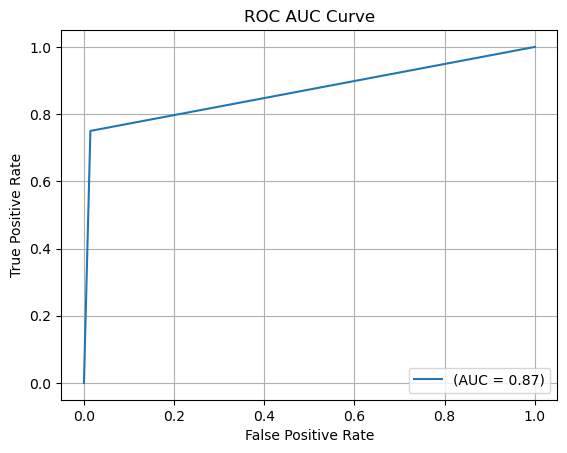

In [46]:
fpr, tpr, _ = roc_curve(y_val, y_pred_lr)
auc = roc_auc_score(y_val, y_pred_lr)
plt.plot(fpr, tpr, label = f"(AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [47]:
# Adding the results in a table
Final_results = pd.concat([Final_results, make_results('Logistic Regression', y_val, y_pred_lr)], ignore_index = True)

## 2. K-Nearest Neighbours

*Building*

In [50]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)
y_pred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

*Evaluation*

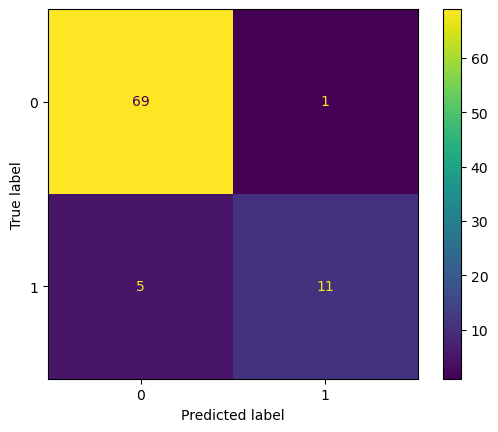

In [52]:
cm_knn = confusion_matrix(y_val, y_pred_knn, labels = knn.classes_)
disp_knn = ConfusionMatrixDisplay(cm_knn, display_labels = knn.classes_)
disp_knn.plot()

In [53]:
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred_knn))
print("Precision:", "%.6f" % precision_score(y_val, y_pred_knn))
print("Recall:", "%.6f" % recall_score(y_val, y_pred_knn))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred_knn))
print("ROC AUC Score:", "%.6f" % roc_auc_score(y_val, y_pred_knn))

Accuracy: 0.930233
Precision: 0.916667
Recall: 0.687500
F1 Score: 0.785714
ROC AUC Score: 0.836607


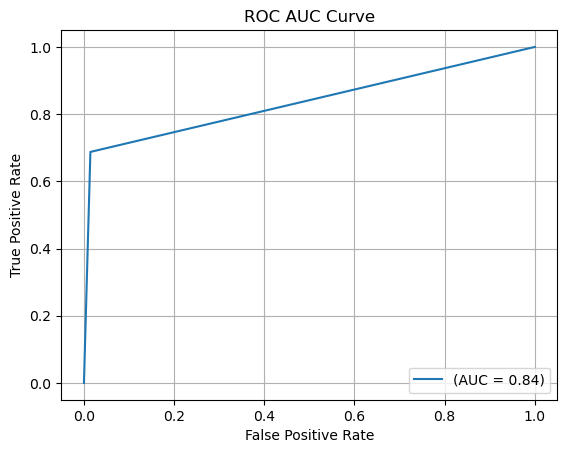

In [54]:
fpr, tpr, _ = roc_curve(y_val, y_pred_knn)
auc = roc_auc_score(y_val, y_pred_knn)
plt.plot(fpr, tpr, label = f"(AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [55]:
# Adding the results in a table
Final_results = pd.concat([Final_results, make_results('K-Nearest Neighbour', y_val, y_pred_knn)], ignore_index = True)

## 3. Support Vector Machine

*Building*

In [58]:
svm = SVC(probability = True, kernel = 'linear', random_state = 42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_val)
y_pred_svm

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

*Evaluation*

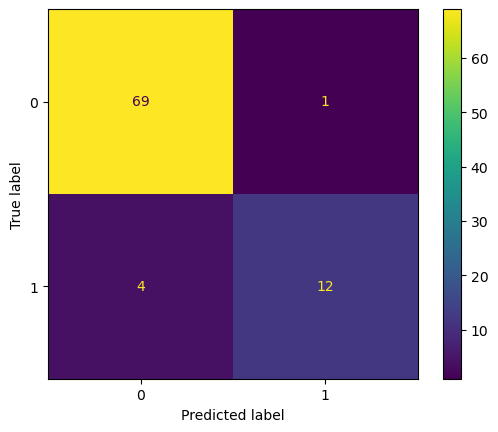

In [60]:
cm_svm = confusion_matrix(y_val, y_pred_svm, labels = svm.classes_)
disp_svm = ConfusionMatrixDisplay(cm_svm, display_labels = svm.classes_)
disp_svm.plot()

In [61]:
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred_svm))
print("Precision:", "%.6f" % precision_score(y_val, y_pred_svm))
print("Recall:", "%.6f" % recall_score(y_val, y_pred_svm))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred_svm))
print("ROC AUC Score:", "%.6f" % roc_auc_score(y_val, y_pred_svm))

Accuracy: 0.941860
Precision: 0.923077
Recall: 0.750000
F1 Score: 0.827586
ROC AUC Score: 0.867857


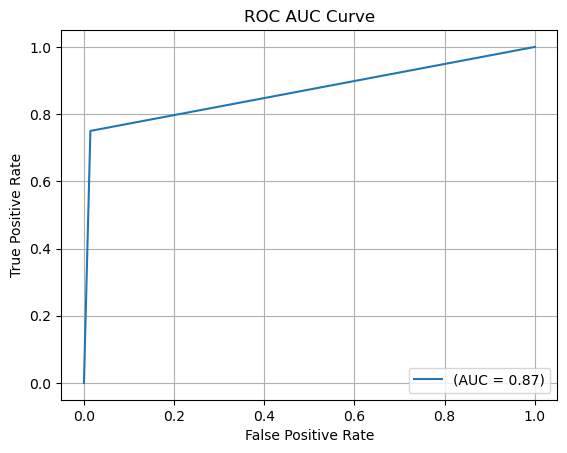

In [62]:
fpr, tpr, _ = roc_curve(y_val, y_pred_svm)
auc = roc_auc_score(y_val, y_pred_svm)
plt.plot(fpr, tpr, label = f"(AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [63]:
# Adding the results in a table
Final_results = pd.concat([Final_results, make_results('Support Vector Machine', y_val, y_pred_svm)], ignore_index = True)

## 4. Decision Tree

*Building*

In [66]:
# Grid Search
tree_para = {'max_depth': [1, 2, 5, 6, 15, 16, 10, 40],
             'min_samples_leaf': [2, 5, 8, 9, 10, 50]
            }
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

dt_classifier = DecisionTreeClassifier(random_state = 42)
grid_search_dt = GridSearchCV(dt_classifier, tree_para, scoring = scoring, cv = 5, refit = 'recall')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 5, 6, 15, 16, 10, 40],
                         'min_samples_leaf': [2, 5, 8, 9, 10, 50]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [67]:
print(grid_search_dt.best_score_)
print(grid_search_dt.best_params_)
print(grid_search_dt.best_estimator_)

0.8555555555555555
{'max_depth': 1, 'min_samples_leaf': 50}
DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, random_state=42)


In [68]:
dt = grid_search_dt.best_estimator_

y_pred_dt = dt.predict(X_val)
y_pred_dt

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

*Evaluation*

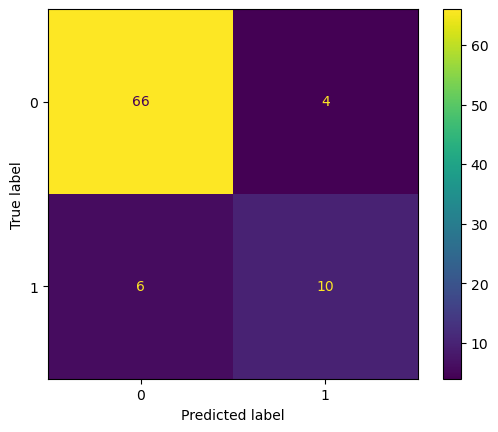

In [70]:
cm_dt = confusion_matrix(y_val, y_pred_dt, labels = dt.classes_)
disp_dt = ConfusionMatrixDisplay(cm_dt, display_labels = dt.classes_)
disp_dt.plot()

In [71]:
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred_dt))
print("Precision:", "%.6f" % precision_score(y_val, y_pred_dt))
print("Recall:", "%.6f" % recall_score(y_val, y_pred_dt))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred_dt))
print("ROC AUC Score:", "%.6f" % roc_auc_score(y_val, y_pred_dt))

Accuracy: 0.883721
Precision: 0.714286
Recall: 0.625000
F1 Score: 0.666667
ROC AUC Score: 0.783929


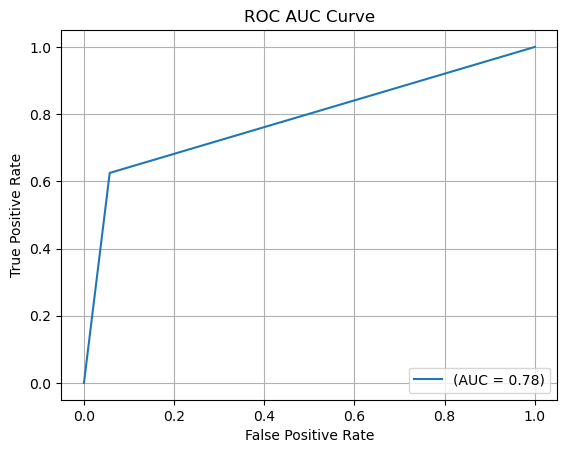

In [72]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
auc = roc_auc_score(y_val, y_pred_dt)
plt.plot(fpr, tpr, label = f"(AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc = 'lower right')
plt.grid()

                      gini_importance
concave points_worst              1.0


Text(0.5, 0, 'Importance')

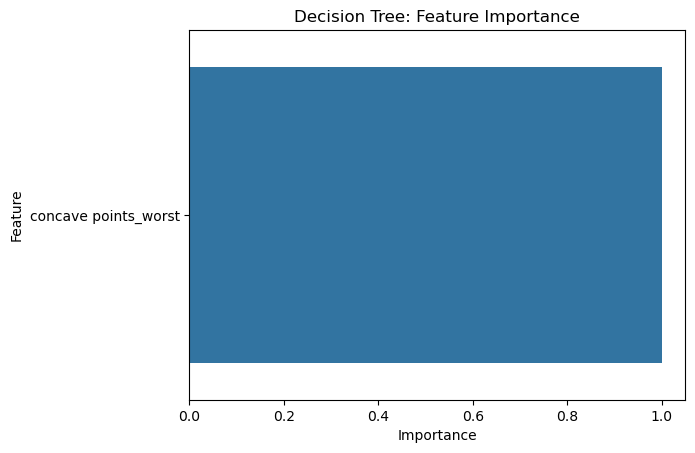

In [73]:
# Calculating importance
tree_importance = pd.DataFrame(dt.feature_importances_, columns = ['gini_importance'], index = X.columns)
tree_importance = tree_importance.sort_values(by = 'gini_importance', ascending = False)

# Only extracting the features with importances > 0
tree_importance = tree_importance[tree_importance['gini_importance'] > 0]
print(tree_importance)

# Plotting the feature importance graph
sns.barplot(data = tree_importance, x = "gini_importance", y = tree_importance.index, orient = 'h')
plt.title("Decision Tree: Feature Importance")
plt.ylabel("Feature")
plt.xlabel("Importance")

In [74]:
# Adding the results in a table
Final_results = pd.concat([Final_results, make_results('Decision Tree', y_val, y_pred_dt)], ignore_index = True)

## 5. Random Forest

*Building*

In [77]:
# Grid Search
forest_para = {'max_depth': [3,5, None],
               'max_features': [1.0],
               'max_samples': [0.7, 1.0]
              }
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

rf_classifier = RandomForestClassifier(random_state = 42)
grid_search_rf = GridSearchCV(rf_classifier, forest_para, scoring = scoring, cv = 4, refit = 'recall')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [78]:
print(grid_search_rf.best_score_)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

0.875
{'max_depth': 3, 'max_features': 1.0, 'max_samples': 0.7}
RandomForestClassifier(max_depth=3, max_features=1.0, max_samples=0.7,
                       random_state=42)


In [79]:
rf = grid_search_rf.best_estimator_

y_pred_rf = rf.predict(X_val)
y_pred_rf

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

*Evaluating*

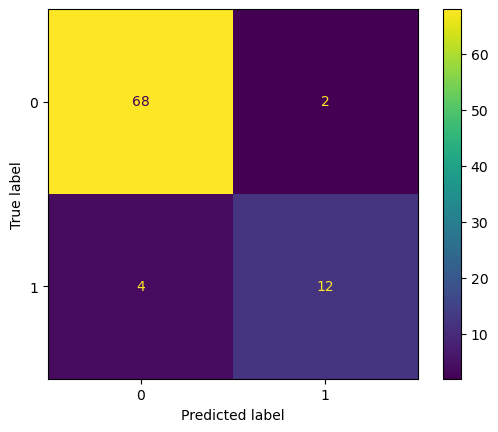

In [81]:
cm_rf = confusion_matrix(y_val, y_pred_rf, labels = rf.classes_)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels = rf.classes_)
disp_rf.plot()

In [82]:
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred_rf))
print("Precision:", "%.6f" % precision_score(y_val, y_pred_rf))
print("Recall:", "%.6f" % recall_score(y_val, y_pred_rf))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred_rf))
print("ROC AUC Score:", "%.6f" % roc_auc_score(y_val, y_pred_rf))

Accuracy: 0.930233
Precision: 0.857143
Recall: 0.750000
F1 Score: 0.800000
ROC AUC Score: 0.860714


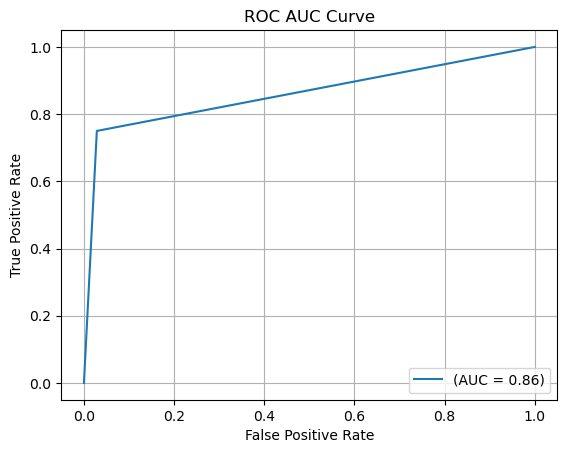

In [83]:
fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
auc = roc_auc_score(y_val, y_pred_rf)
plt.plot(fpr, tpr, label = f"(AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc = 'lower right')
plt.grid()

                           gini_importance
concave points_worst              0.265325
area_diff                         0.223124
perimeter_diff                    0.122374
perimeter_worst                   0.100573
concave points_mean               0.070441
radius_diff                       0.044857
smoothness_worst                  0.021889
concavity_mean                    0.021449
area_worst                        0.013806
texture_mean                      0.013415
concavity_worst                   0.010655
texture_worst                     0.010530
radius_worst                      0.009952
symmetry_worst                    0.008246
area_se                           0.008245
concavity_perimeter_ratio         0.007650
radius_perimeter_ratio            0.007001
radius_mean                       0.004620
area_mean                         0.004427
smoothness_mean                   0.004405
fractal_dimension_mean            0.003854
symmetry_se                       0.003186
id         

Text(0.5, 0, 'Importance')

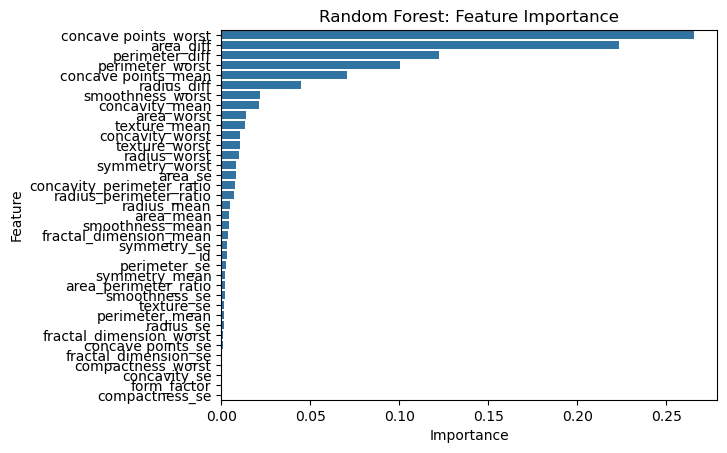

In [84]:
# Calculating importance
forest_importance = pd.DataFrame(rf.feature_importances_, columns = ['gini_importance'], index = X.columns)
forest_importance = forest_importance.sort_values(by = 'gini_importance', ascending = False)

# Only extracting the features with importances > 0
forest_importance = forest_importance[forest_importance['gini_importance'] > 0]
print(forest_importance)

# Plotting the feature importance graph
sns.barplot(data = forest_importance, x = "gini_importance", y = forest_importance.index, orient = 'h')
plt.title("Random Forest: Feature Importance")
plt.ylabel("Feature")
plt.xlabel("Importance")

In [85]:
# Adding the results in a table
Final_results = pd.concat([Final_results, make_results('Random Forest', y_val, y_pred_rf)], ignore_index = True)

## 6. Voting Classifier

*Building*

In [88]:
vc = VotingClassifier(estimators = [('logistic_regression', lr),
                                    ('knearest_neighbour', knn),
                                    ('support_vector_machine', svm),
                                    ('decision_tree', dt_classifier),
                                    ('random_forest', rf_classifier)],
                      voting = 'soft'
                     )
vc.fit(X_train, y_train)

y_pred_vc = vc.predict(X_val)
y_pred_vc

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

*Evaluating*

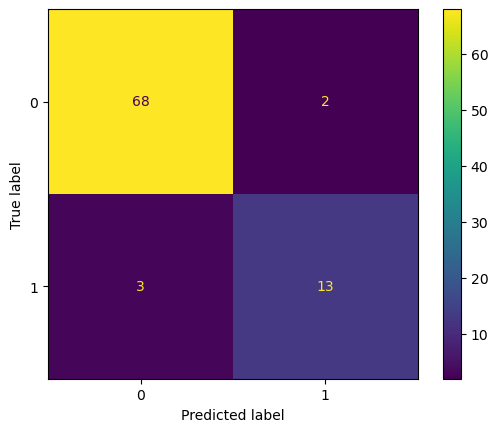

In [90]:
cm_vc = confusion_matrix(y_val, y_pred_vc, labels = vc.classes_)
disp_vc = ConfusionMatrixDisplay(cm_vc, display_labels = vc.classes_)
disp_vc.plot()

In [91]:
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred_vc))
print("Precision:", "%.6f" % precision_score(y_val, y_pred_vc))
print("Recall:", "%.6f" % recall_score(y_val, y_pred_vc))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred_vc))
print("ROC AUC Score:", "%.6f" % roc_auc_score(y_val, y_pred_vc))

Accuracy: 0.941860
Precision: 0.866667
Recall: 0.812500
F1 Score: 0.838710
ROC AUC Score: 0.891964


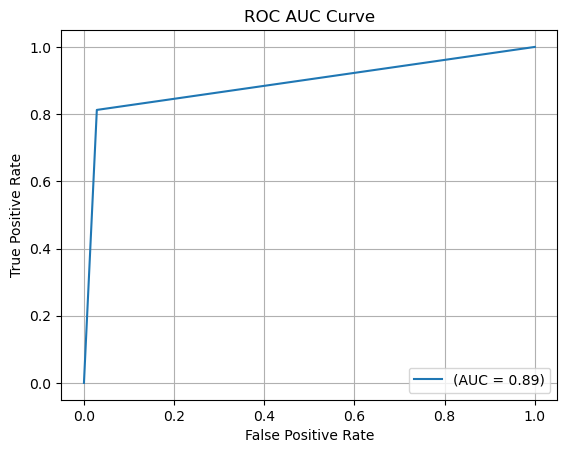

In [92]:
fpr, tpr, _ = roc_curve(y_val, y_pred_vc)
auc = roc_auc_score(y_val, y_pred_vc)
plt.plot(fpr, tpr, label = f"(AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [93]:
# Adding the results in a table
Final_results = pd.concat([Final_results, make_results('Voting Classifier', y_val, y_pred_vc)], ignore_index = True)

# Creating a pipeline & saving the model for deployment

In [95]:
pipeline = Pipeline([('scaler', StandardScaler()), ('model', vc)])
pipeline.fit(X_train, y_train)

dump(pipeline, 'pipeline_breast_cancer_model.joblib')

['pipeline_breast_cancer_model.joblib']

# Model Testing & Evaluation using test dataset

In [97]:
Final_results

,model,accuracy,precision,recall,f1,roc auc
0,Logistic Regression,0.941860,0.923077,0.7500,0.827586,0.867857
1,K-Nearest Neighbour,0.930233,0.916667,0.6875,0.785714,0.836607
2,Support Vector Machine,0.941860,0.923077,0.7500,0.827586,0.867857
3,Decision Tree,0.883721,0.714286,0.6250,0.666667,0.783929
4,Random Forest,0.930233,0.857143,0.7500,0.800000,0.860714
5,Voting Classifier,0.941860,0.866667,0.8125,0.838710,0.891964


**For our final model, we are choosing *Voting Classifier* as it has the highest recall which we wanted to maximize.**

In [99]:
y_pred_final = vc.predict(X_test)
y_pred_final

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [100]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

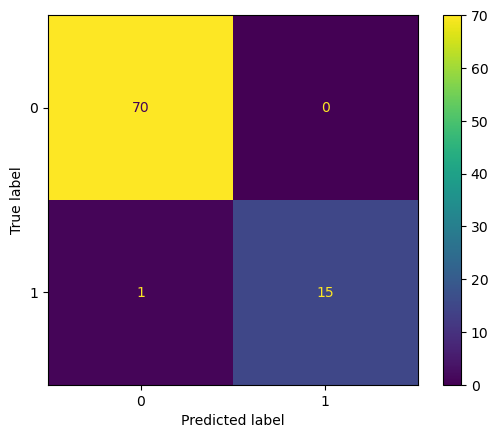

In [101]:
cm_final = confusion_matrix(y_test, y_pred_final, labels = vc.classes_)
disp_final = ConfusionMatrixDisplay(cm_final, display_labels = vc.classes_)
disp_final.plot()

In [102]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred_final))
print("Precision:", "%.6f" % precision_score(y_test, y_pred_final))
print("Recall:", "%.6f" % recall_score(y_test, y_pred_final))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred_final))
print("ROC AUC Score:", "%.6f" % roc_auc_score(y_test, y_pred_final))

Accuracy: 0.988372
Precision: 1.000000
Recall: 0.937500
F1 Score: 0.967742
ROC AUC Score: 0.968750


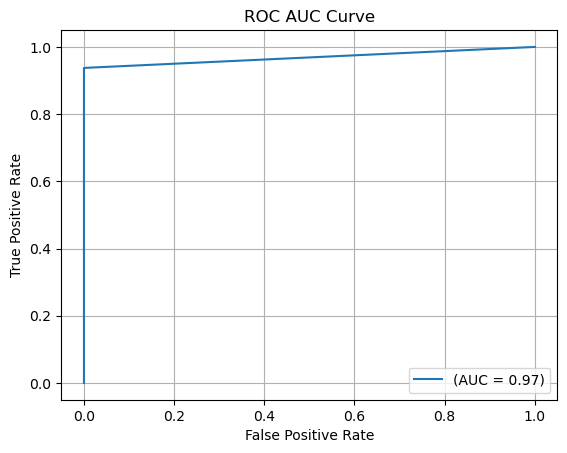

In [103]:
fpr, tpr, _ = roc_curve(y_test, y_pred_final)
auc = roc_auc_score(y_test, y_pred_final)
plt.plot(fpr, tpr, label = f"(AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc = 'lower right')
plt.grid()